# Worked Problem Assignment 3

### <p style="text-align: right;">  Kyle Taft

In [1]:
# Import packages
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np

### Background
The problem that I chose to work on was a variation of the classic sphereical shell problem. This problem was inspiried by the "Introduction to Electrodynamics" by David J. Griffiths problem set. The problem is of a sphere with a thick spherical shell that has a charge density that varies with radius. This shell is from radius a to b and has a charge density of $\rho = k/r^2$. The important consideration for this problem is that the electric field is not a single continous function. This forces us to solve inside the sphere, inside the shell, and outside of the sphere. The variables a,b, and k are all constants that we can choose to be whatever we want. For this problem I chose a = 2, b = 4, and k = 1.

### Solution

Gauss's law seemly highly applicable here from the spherical symmetry of the problem. This allows me to define Gaussian surface to simplify the solution.

First, we calculate the E-field inside of the sphere ($r<a$). We can do this by using Gauss's law and a Gaussian surface of a sphere with radius r. This gives us the following equation: 

$$\oint \vec{E} \cdot d\vec{A} = \frac{Q_{enc}}{\epsilon_0}$$

Knowing we have a spherical surface of radius r and a $Q_{enc}$ of 0 (since there is no charge inside the sphere) we can simplify the equation to the following:

$$E(4\pi r^2) = 0 $$

This gives us an E-field of 0 inside the sphere.

Next, we calculate the E-field inside of the shell ($a<r<b$). We can do this again by using Gauss's law and a Gaussian surface of a sphere with radius r. This gives us the following equation:

$$E(4\pi r^2) = \frac{Q_{enc}}{\epsilon_0}$$

Here, $Q_{enc}$ is not as trivial to calculate. We know that the charge density is $\rho = k/r^2$ and that the integration factor is $d\tau = r^2 sin(\theta) dr d\theta d\phi$. This allows us to calculate the charge of the shell as follows:

$$Q_{enc} = \int \rho d\tau = \int_{a}^{r} \frac{k}{r^2} r^2 sin(\theta) dr d\theta d\phi$$

By spherical symmetry we can integrate out the $\theta$ and $\phi$ terms to get the following:

$$Q_{enc} = 4\pi k \int_{a}^{r} dr = 4\pi k (r-a)$$

This means that the E-field inside the shell is:

$$\vec{E} = \frac{k}{\epsilon_0} \frac{(r-a)}{r^2} \hat{r}$$

Finally, we calculate the E-field outside of the sphere ($r>b$). This is done in the same way as the previous calculation except the upper bound on the integral is b. This gives us the following:

$$\vec{E} = \frac{k}{\epsilon_0} \frac{(b-a)}{r^2} \hat{r}$$

### Code

In [2]:
# Define our electric field functions for each region
E1 = lambda r: 0
E2 = lambda r,k,epp,a: k/epp * ((r - a)/r**2)
E3 = lambda r,k,epp,a,b: k/epp * ((b - a)/r**2)

def Efield(r):
    k = 0.5
    epp = 1
    a = 2
    b = 4  
    
    if r < a:
        return E1(r)
    elif r < b:
        return E2(r,k,epp,a)
    else:
        return E3(r,k,epp,a,b)

To get a feeling for what the electric field looks like from the equations that we solved for above, I decided to plot the E-field as a function of radius below. The result makes sense as the E-field is 0 inside the sphere, increases as we get a proportion of $\frac{1}{r^2}$ more charge from the charge density inside the shell, and decreases $\frac{1}{r^2}$ as we are outside. This $\frac{1}{r^2}$ is especially expected as we think about the behavior of the E-field from a point charge as we move away from the sphere.

Text(0.5, 1.0, 'Electric Field vs. Radius')

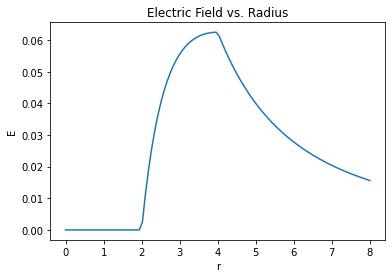

In [3]:
r = np.linspace(0,8,100)
E = [Efield(r) for r in r]

plt.plot(r,E)
plt.xlabel('r')
plt.ylabel('E')
plt.title('Electric Field vs. Radius')

This graph represents a cross section of the E-field as a function of radius to better visualize the E-field. The E-field is in the $\hat{r}$ direction.

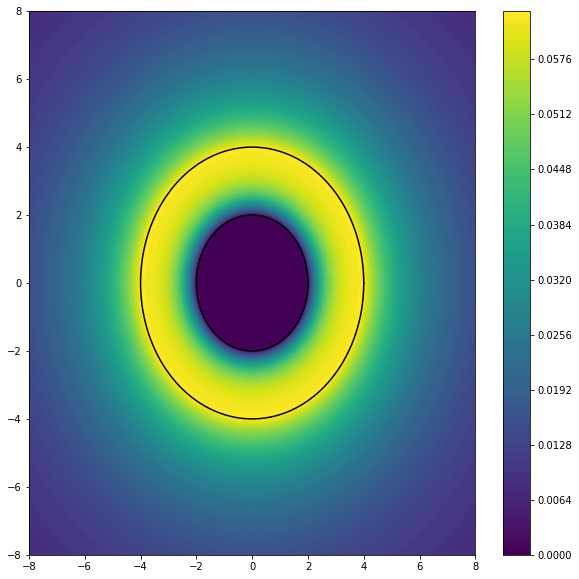

In [4]:
X,Y = np.meshgrid(np.linspace(-8,8,500),np.linspace(-8,8,500))
Z = np.zeros(X.shape)
for i in range(len(X)):
    for j in range(len(Y)):
        Z[i,j] = Efield(np.sqrt(X[i,j]**2 + Y[i,j]**2))



plt.figure(figsize=(10,10))
plt.plot(2*np.cos(np.linspace(0,2*np.pi,1000)),2*np.sin(np.linspace(0,2*np.pi,1000)), color='black')
plt.plot(4*np.cos(np.linspace(0,2*np.pi,1000)),4*np.sin(np.linspace(0,2*np.pi,1000)), color='black')
plt.contourf(X,Y,Z,100)
plt.colorbar()
plt.show()


The plotting code below shows again a plot of the e-field but with the use of quivers on a 3D plot. Additionally the shells are plotted to better visualize the problem.

In [5]:
# adaptation from ICA
def electric_field3D(x_points, y_points, z_points):
    k = 8.99e9  # Nm^2/C^2, Coulomb's constant
    
    # Initialize electric field components to zero
    E_x = np.zeros_like(x_points)
    E_y = np.zeros_like(y_points)
    E_z = np.zeros_like(z_points)
    
    # Calculate electric field components due to the point charge at each point on the grid
    for i in range(x_points.shape[0]):
        for j in range(y_points.shape[0]):
            for k in range(z_points.shape[0]):
                r_x = x_points[i, j, k]
                r_y = y_points[i, j, k]
                r_z = z_points[i, j, k]
                r_magnitude = np.sqrt(r_x**2 + r_y**2 + r_z**2)
                if r_magnitude != 0:  # Avoid division by zero
                    r_unit_x = r_x / r_magnitude
                    r_unit_y = r_y / r_magnitude
                    r_unit_z = r_z / r_magnitude
                    E_x[i, j, k] = Efield(r_magnitude) * r_unit_x
                    E_y[i, j, k] = Efield(r_magnitude) * r_unit_y
                    E_z[i, j, k] = Efield(r_magnitude) * r_unit_z
    
    return E_x, E_y, E_z

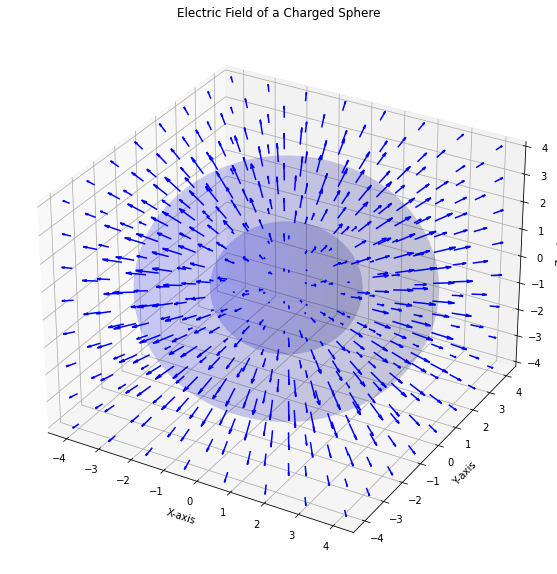

In [6]:
x = np.linspace(-4, 4, 8)
y = np.linspace(-4, 4, 8)
z = np.linspace(-4, 4, 8)
X, Y, Z = np.meshgrid(x, y ,z)

E_x, E_y, E_z = electric_field3D(X, Y, Z)
# Create a 3D quiver plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, E_x, E_y, E_z, length=10, color='b')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Electric Field of a Charged Sphere')

# Plot the shells
for r in [2,4]:
    # Create the mesh in spherical coordinates
    phi = np.linspace(0, np.pi, 1000)
    theta = np.linspace(0, 2*np.pi, 1000)
    phi, theta = np.meshgrid(phi, theta)

    # The Cartesian coordinates of the unit sphere
    x = r*np.sin(phi)*np.cos(theta)
    y = r*np.sin(phi)*np.sin(theta)
    z = r*np.cos(phi)

    # Plot the surface
    ax.plot_surface(x, y, z, color='b', alpha=0.1)
plt.show()
